In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df_aisles= pd.read_csv('data/aisles.csv')
df_departments= pd.read_csv('data/departments.csv')
df_orders= pd.read_csv('data/orders.csv')
df_products= pd.read_csv('data/products.csv')
df_sample_submission= pd.read_csv('data/sample_submission.csv')
df_order_products__prior= pd.read_csv('data/order_products__prior.csv')
df_order_products__train= pd.read_csv('data/order_products__train.csv')

In [4]:
df = {  
    'aisles': df_aisles,
    'departments':df_departments,
    'orders': df_orders,
    'products': df_products,
    'sample_submission': df_sample_submission,
    'order_products_prior': df_order_products__prior,
    'order_products_train': df_order_products__train}

In [4]:
for key in df:
    print('\n\n\b', key)
    print(df[key].info())



 aisles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


 departments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


 orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number   

In [5]:
for key in df:
    print('\n\n\b', key)
    print(df[key].head())



 aisles
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


 departments
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


 orders
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2      

In [6]:
for key in df:
    print('\n\n\b', key)
    print(df[key].describe())



 aisles
         aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000


 departments
       department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000


 orders
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day 

In [11]:
# как я понимаю их вполне можно объединять пока это единичный анализ
# в дальнейшем все равно останутся только нужные столбцы

df['order_products_prior'] = pd.merge(df['order_products_prior'], df['products'], on='product_id', how='left')
df['order_products_prior'] = pd.merge(df['order_products_prior'], df['aisles'], on='aisle_id', how='left')
df['order_products_prior'] = pd.merge(df['order_products_prior'], df['departments'], on='department_id', how='left')
df['order_products_prior'].head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


### 1.0 Процент пропущенных значений

In [8]:
# percentage of missing values
# как убрать dtype?
for key in df:
    print('\n\n\b', key)
    print(df[key].isna().mean())
    print(df[key].isna().mean().mean())



 aisles
aisle_id    0.0
aisle       0.0
dtype: float64
0.0


 departments
department_id    0.0
department       0.0
dtype: float64
0.0


 orders
order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64
0.008610848836882522


 products
product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64
0.0


 sample_submission
order_id    0.0
products    0.0
dtype: float64
0.0


 order_products_prior
order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
product_name         0.0
aisle_id             0.0
department_id        0.0
aisle                0.0
department           0.0
dtype: float64
0.0


 order_products_train
order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered  

In [9]:
df_orders[df_orders['days_since_prior_order'].isna()].head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN


In [10]:
# видно что NaN только в столбце days_since_prior_order - делаем вывод, что это 1 приход в магазин

# --- удалим так как относительно мало данных к удалению? 
# --- или стоит заменить на что-то (хотя на что вообще заменить...)
# --- или стоит оставить старый датасет и отдельно записать новый без пропусков

# +++ наверное стоит отделить и рассматривать отдельно тк это первый поход покупателя в магазин !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
# +++ ну или и отделить, и сохранить общий - в сумме будет 3 разных, или просто запомнить индексы кто где 
#     если рассматривать полный дф, тогда не юзать при расчетах столбец с NaN

# +++ тут я ничего с ним не высчитывала, поэтому оставила все как есть, ведь данные хорошие

# for key in df:
#     if df[key].isna().mean().sum():
#         df[key].dropna(inplace=True)

### 1.1 Число заказов каждого пользователя

Text(0, 0.5, 'Total number of orders')

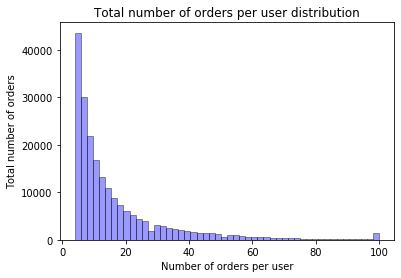

In [41]:
# число заказов на человека

info = df['orders'].groupby('user_id').count()

# seaborn histogram
sns.distplot(info['order_id'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'}, axlabel='number of orders')

# Add labels
plt.title('Total number of orders per user distribution')
plt.xlabel('Number of orders per user')
plt.ylabel('Total number of orders')

### 1.3.1 Время между заказами

Text(0, 0.5, 'Total days since prior order')

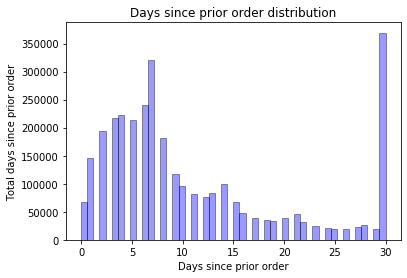

In [42]:
sns.distplot(df['orders']['days_since_prior_order'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Days since prior order distribution')
plt.xlabel('Days since prior order')
plt.ylabel('Total days since prior order')

# чаще всего люди заказывают продукты снова спустя неделю/месяц

### 1.3.2 Сколько времени прошло с момента 1 покупки

Text(0, 0.5, 'Total days since first order')

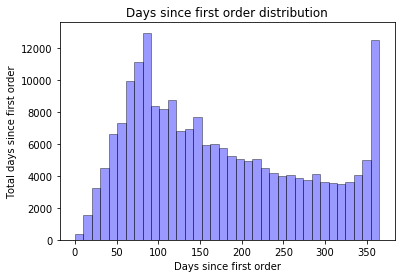

In [43]:
# время с первого заказа

info = df['orders'].groupby('user_id').sum()

sns.distplot(info['days_since_prior_order'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'}, axlabel='days since first order')

plt.title('Days since first order distribution')
plt.xlabel('Days since first order')
plt.ylabel('Total days since first order')

# больше всего людей пришло в магазин впервые ~3 месяца назад

### 1.4 Самые популярные часы для совершения покупок (in common)

Text(0, 0.5, 'Total order hour of day')

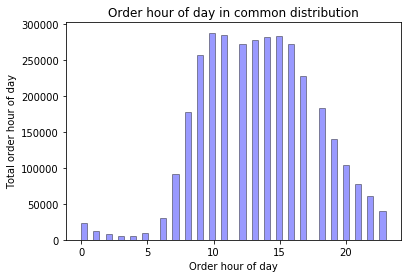

In [46]:
# самые популярные часы продаж in common

# seaborn histogram
sns.distplot(df['orders']['order_hour_of_day'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Order hour of day in common distribution')
plt.xlabel('Order hour of day')
plt.ylabel('Total order hour of day')

### 1.5 Самые популярные дни для покупок (in common)

Text(0, 0.5, 'Total order day of week')

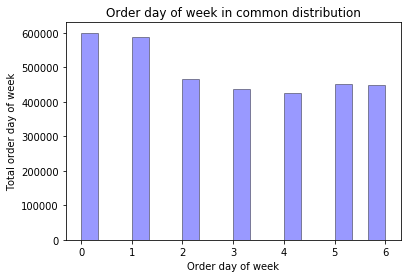

In [47]:
# самые популярные дни продаж in common

# seaborn histogram
sns.distplot(df['orders']['order_dow'], hist=True, kde=False, bins=int(180/10), color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Order day of week in common distribution')
plt.xlabel('Order day of week')
plt.ylabel('Total order day of week')

# первые два дня (есть ли информация что это за дни? \
# обычно начинается с воскресенья, но по логике люди обычно ходят в магазин по выходным...)

### 1.6 Самые популярные часы покупок для каждого пользователя (per user)

Text(0, 0.5, 'Total order hour of day')

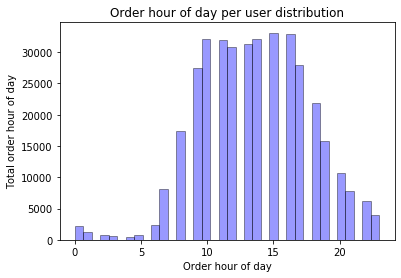

In [49]:
# самый популярный час покупок для каждого покупателя
d = pd.DataFrame({'count' : df['orders'].groupby('user_id')['order_hour_of_day'].value_counts()}).reset_index()
info = d[d.groupby(['user_id'])['count'].transform(max) == d['count']]

sns.distplot(info['order_hour_of_day'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Order hour of day per user distribution')
plt.xlabel('Order hour of day')
plt.ylabel('Total order hour of day')

### 1.7 Самый популярный день покупок для каждого пользователя (per user)

Text(0, 0.5, 'Total order day of week')

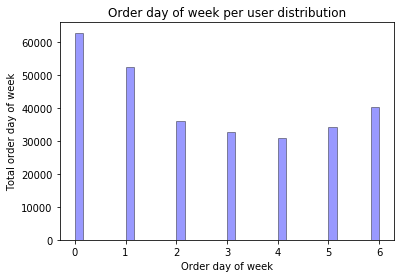

In [48]:
# самый популярный день покупок для каждого покупателя 
d = pd.DataFrame({'count' : df['orders'].groupby('user_id')['order_dow'].value_counts()}).reset_index()
info = d[d.groupby(['user_id'])['count'].transform(max) == d['count']]

sns.distplot(info['order_dow'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Order day of week per user distribution')
plt.xlabel('Order day of week')
plt.ylabel('Total order day of week')

### 1.8 Зависимость день-час

Text(33.0, 0.5, 'Order hour of day')

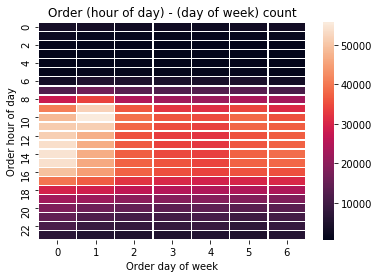

In [63]:
h = df['orders'].pivot_table(
                index='order_hour_of_day', 
                columns='order_dow', 
                values='order_id',
                aggfunc='count')
# sns.heatmap(h, annot=True, fmt=".1f", linewidths=.5)
sns.heatmap(h, linewidths=.5)

plt.title('Order (hour of day) - (day of week) count')
plt.xlabel('Order day of week')
plt.ylabel('Order hour of day')

### 1.9 Самые популярные продукты (топ-20)

#### 1.9.1 Чаще первые попадают в корзину

In [24]:
first_in_cart_products = df['order_products_prior'][df['order_products_prior']['add_to_cart_order']==1].groupby(['product_id', 'product_name'])['product_name'].count().to_frame('count')
first_in_cart_products.sort_values(by='count', ascending=False)[:20]

,,count
product_id,product_name,
24852,Banana,110916
13176,Bag of Organic Bananas,78988
27845,Organic Whole Milk,30927
21137,Organic Strawberries,27975
47209,Organic Hass Avocado,24116
21903,Organic Baby Spinach,23543
47766,Organic Avocado,22398
19660,Spring Water,16822
16797,Strawberries,16366


#### 1.9.2 Самые популярные в целом

In [25]:
# список id самых популярных продуктов
# most_popular_products_ids = df['order_products_prior']['product_id'].value_counts().sort_values(ascending=False).index[:20]

# дф популярных продуктов
# popular_list = df['products'][df['products']['product_id'].isin(most_popular_products_ids)]

# отсортированный дф
# popular_ids_sort = pd.DataFrame({'product_id': most_popular_products_ids})
# pd.merge(popular_ids_sort, popular_list, left_on='product_id', right_on='product_id', how='left')

most_popular_products = df['order_products_prior'].groupby(['product_id', 'product_name'])['product_id'].count().to_frame('Count')

most_popular_products.sort_values(by='Count', ascending=False)[:20].reset_index()

,product_id,product_name,Count
0,24852,Banana,472565
1,13176,Bag of Organic Bananas,379450
2,21137,Organic Strawberries,264683
3,21903,Organic Baby Spinach,241921
4,47209,Organic Hass Avocado,213584
5,47766,Organic Avocado,176815
6,47626,Large Lemon,152657
7,16797,Strawberries,142951
8,26209,Limes,140627
9,27845,Organic Whole Milk,137905


### 1.10 Зависимость частоты повторной покупки от того, под каким номером продукт попадает в корзину      (слайсы + полный график)

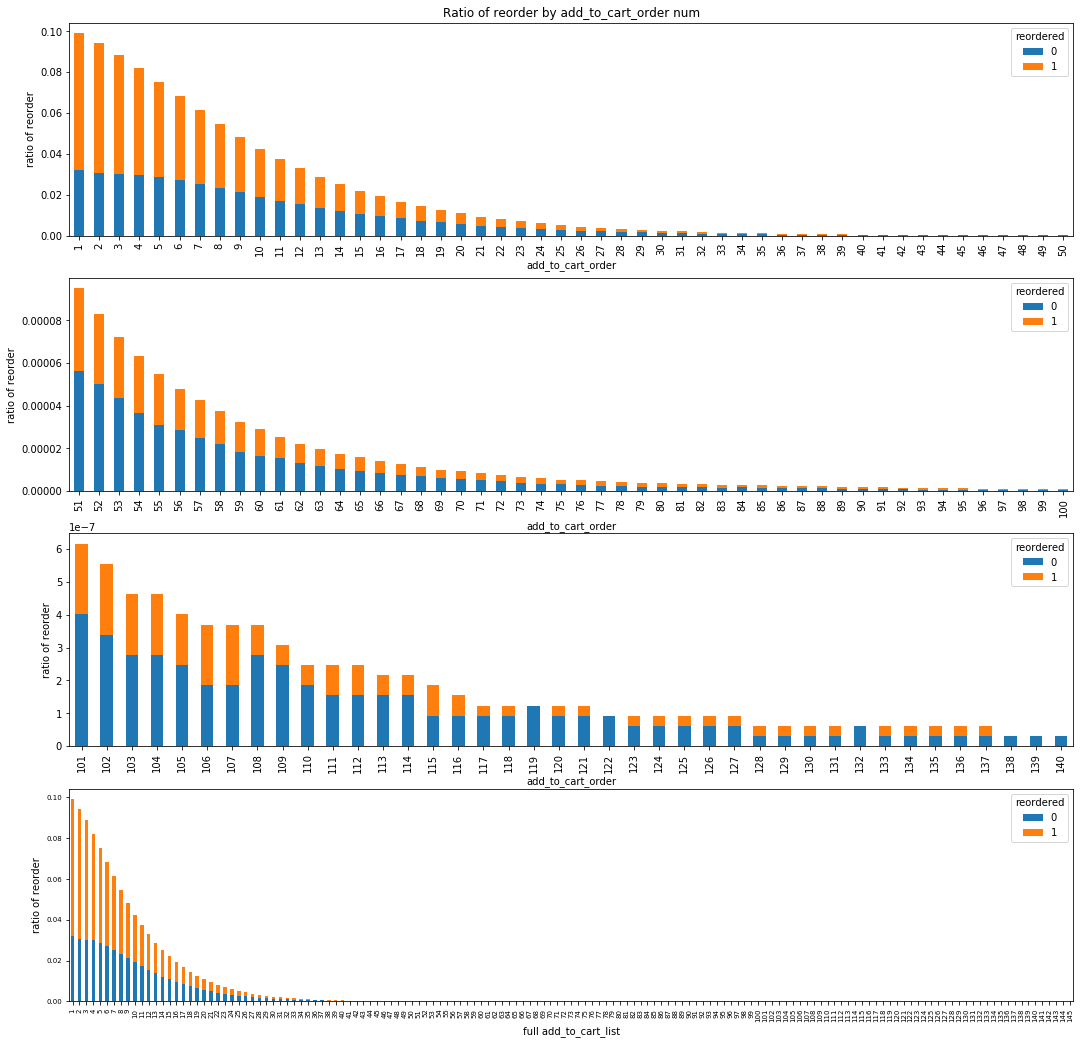

In [62]:
# можно просто слайсить или все же ограничивать следующие значения и учитывать их?
fig, axes = plt.subplots(4, 1, figsize=(18, 18));
tab = pd.DataFrame(pd.crosstab(df['order_products_prior']['add_to_cart_order'], df['order_products_prior']['reordered'], normalize=True))

fig = tab[:50].plot.bar(stacked=True, rot=90, ax=axes[0])
fig1 = tab[50:100].plot.bar(stacked=True, rot=90, ax=axes[1])
fig2 = tab[100:140].plot.bar(stacked=True, rot=90, ax=axes[2])
fig3 = tab.plot.bar(stacked=True, rot=90, ax=axes[3])

fig.set(ylabel="ratio of reorder", xlabel='add_to_cart_order', title='Ratio of reorder by add_to_cart_order num')
fig1.set(ylabel="ratio of reorder", xlabel='add_to_cart_order')
fig2.set(ylabel="ratio of reorder", xlabel='add_to_cart_order')

fig3.set(ylabel="ratio of reorder", xlabel='full add_to_cart_list')

plt.tick_params(axis='both', which='major', labelsize=7)

In [46]:
# здесь учтены все, но значения > 50 стали 50 (полный график не более наглядный чем приведенные)
 
# df['order_products_prior']['lim_add_to_cart_order'] = df['order_products_prior']['add_to_cart_order']
# df['order_products_prior']['lim_add_to_cart_order'][df['order_products_prior']['lim_add_to_cart_order'] > 50] = 50

# tab = pd.DataFrame(pd.crosstab(df['order_products_prior']['lim_add_to_cart_order'], df['order_products_prior']['reordered'], normalize=True))
# fig = tab.plot.bar(stacked=True, rot=90)
# fig.set(ylabel="ratio of reorder")

### 1.11 Самые популярные отделы

Text(0, 0.5, 'Total orders')

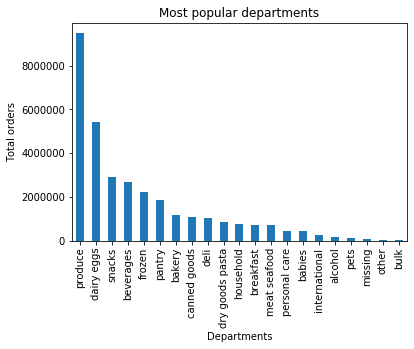

In [64]:
df['order_products_prior']['department'].value_counts().plot(kind='bar');

plt.title('Most popular departments')
plt.xlabel('Departments')
plt.ylabel('Total orders')

### 1.12 Самые популярные ряды

Text(0, 0.5, 'Total orders')

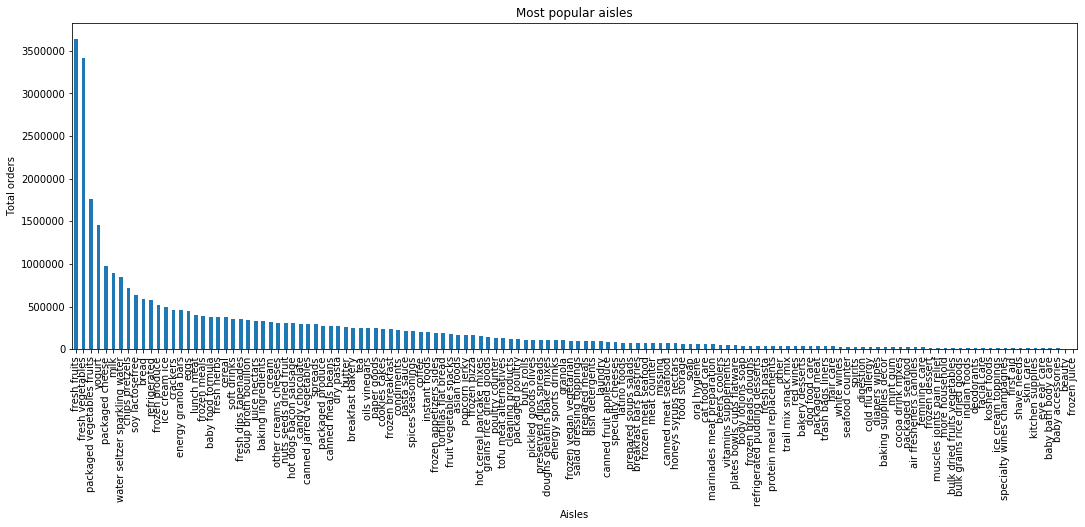

In [65]:

fig, axes = plt.subplots(1, 1, figsize=(18, 6));
df['order_products_prior']['aisle'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=axes);

plt.title('Most popular aisles')
plt.xlabel('Aisles')
plt.ylabel('Total orders')

### 1.13 Список популярных reordered-продуктов

Text(0, 0.5, 'Total orders')

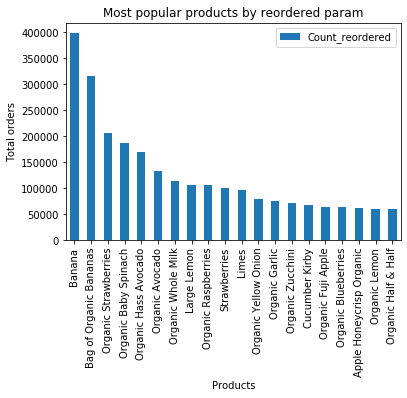

In [66]:
reordered = df['order_products_prior'][df['order_products_prior']['reordered'] == 1].groupby('product_name')['product_id'].count().to_frame('Count_reordered')

reordered.sort_values(by='Count_reordered', ascending=False)[:20].plot(kind='bar')

plt.title('Most popular products by reordered param')
plt.xlabel('Products')
plt.ylabel('Total orders')

### 1.14.1 Объем продаж органических/неорганических продуктов

Text(0, 0.5, 'Total orders')

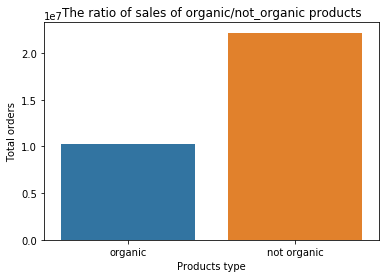

In [67]:
organic_products_sold = df['order_products_prior'][df['order_products_prior']['product_name'].str.contains('Organic')]['product_id'].count()
non_organic_products_sold = len(df['order_products_prior']) - organic_products_sold
sns.barplot(x=['organic', 'not organic'], y=[organic_products_sold, non_organic_products_sold])

plt.title('The ratio of sales of organic/not_organic products')
plt.xlabel('Products type')
plt.ylabel('Total orders')

### 1.14.2 Среднее по повторной покупке органических/неорганических продуктов

Text(0, 0.5, 'Total orders')

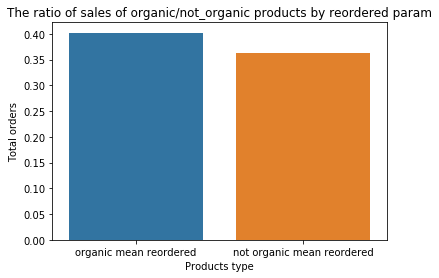

In [68]:
# среднее для каждого продукта
organic_products_sold = df['order_products_prior'].groupby('product_name')['reordered'].mean().to_frame('mean_reordered').reset_index()

# индексы органических
organic_ind = organic_products_sold['product_name'].str.contains('Organic')

# среднее по mean_reordered для органических продуктов
reordered_organic_products_mean = organic_products_sold[organic_ind]['mean_reordered'].mean()

# среднее по mean_reordered для неорганических продуктов
reordered_non_organic_products_mean = organic_products_sold[organic_ind == False]['mean_reordered'].mean()

sns.barplot(x=['organic mean reordered', 'not organic mean reordered'], y=[reordered_organic_products_mean, reordered_non_organic_products_mean])

plt.title('The ratio of sales of organic/not_organic products by reordered param')
plt.xlabel('Products type')
plt.ylabel('Total orders')

In [140]:
# видим, что покупают больше неорганических продуктов, но в среднем орагнические продукты чаще покупают повторно

### 1.15 Какие предметы чаще покупают вместе

In [5]:
from itertools import combinations
from collections import Counter

In [6]:
df['order_products_train'] = pd.merge(df['order_products_train'], df['products'], on='product_id', how='left')
df['order_products_train']['grouped_products'] = df['order_products_train'].groupby('order_id')['product_name'].transform(lambda x: ','.join(x))
result = df['order_products_train'][['order_id', 'grouped_products']]
result = result.drop_duplicates()

count = Counter()

for row in result['grouped_products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [31]:
for key, val in count.most_common(20):
    print(val, key)

2277 ('Bag of Organic Bananas', 'Organic Strawberries')
1608 ('Banana', 'Organic Strawberries')
1605 ('Bag of Organic Bananas', 'Organic Baby Spinach')
1594 ('Bag of Organic Bananas', 'Organic Hass Avocado')
1591 ('Banana', 'Large Lemon')
1484 ('Clementines', ' Bag')
1425 ('Banana', 'Organic Baby Spinach')
1391 ('Banana', 'Strawberries')
1377 ('Banana', 'Organic Avocado')
1194 ('Bag of Organic Bananas', 'Organic Raspberries')
1070 ('Organic Red Radish', ' Bunch')
960 ('Bag of Organic Bananas', 'Organic Cucumber')
955 ('Banana', 'Limes')
919 ('Organic Raspberries', 'Organic Strawberries')
913 ('Organic Hass Avocado', 'Organic Strawberries')
908 ('Banana', 'Honeycrisp Apple')
907 ('Banana', 'Seedless Red Grapes')
897 ('Large Lemon', 'Limes')
883 ('Milk', ' Vitamin D')
881 ('Organic Avocado', 'Large Lemon')


# Summary

+ Пропущенных значений нет - только NaN в столбце days_since_prior_order, что соответствует первому заказу


+ Большая часть покупателей совершила менее 10 заказов


+ В среднем люди повторно закупают продукты спустя неделю/месяц 


+ Большой прирост в пользовательской базе произошел ~3 месяца назад и около 100 дней назад


+ Пики по числу заказов находятся в 10 и 15 часах (обобщая, можно выделить временные промежутки: 9-11 & 14-16). Выводы остаются верны и для выборки для каждого пользователя индивидуально в среднем.


+ Чаще всего покупают продукты в 0 и 1 дни, примерно одинаково по объему. Так как обычно люди закупаются по выходным, то можно сделать вывод, что это суббота и воскресенье. Выводы остаются верны и для выборки для каждого пользователя индивидуально в среднем, но здесь в 0 день продажи уже значимо выше, чем в 1.


+ То есть самое популярное время для покупок -- 0 и 1 день с 10 до 16 часов


+ топ-5 продуктов, которые первыми оказываются в корзине:
        Banana
        Bag of Organic Bananas
        Organic Whole Milk
        Organic Strawberries
        Organic Hass Avocado


+ топ-5 самых продаваемых товаров:
        Banana
        Bag of Organic Bananas
        Organic Strawberries
        Organic Baby Spinach
        Organic Hass Avocado


+ В среднем люди чаще покупают снова те продукты, которые оказались в корзине первыми и чем позднее предмет оказался в корзине, тем выше вероятность того, что его не купят повторно (те среднее reordered=1 сначала выше, чем reordered=0 и это соотношение изменяется в обратную сторону с ростом номера, под которым продукт попал в корзину). Значения сравниваются примерно на 15 номере.


+ топ-5 самых популярных отделов:
        Produce
        Daory Eggs
        Snacks
        Beverages
        Frozen


+ топ-5 самых популярных рядов:
        fresh fruits
        fresh vegetables
        packaged vegetables fruits
        yogurt
        packaged cheese


+ топ-5 самых популярных по reordered продуктов:
        Banana
        Bag of Organic Bananas
        Organic Strawberries
        Organic Baby Spinach
        Organic Hass Avocado
        
        
+ Продажи органических продуктов примерно в 2 раза ниже, чем неорганических


+ Органические продукты в среднем покупают снова чаще, чем неорганические


+ Топ-5 пар предметов чаще всего покупаемых вместе:
        Bag of Organic Bananas - Organic Strawberries   
        Banana                 - Organic Strawberries   
        Bag of Organic Bananas - Organic Baby Spinach
        Bag of Organic Bananas - Organic Hass Avocado
        Banana                 - Large Lemon